Firstly, we import the libraries required 

In [2]:
import numpy as np 
import math
import matplotlib.pyplot as plt
import pandas as pd

We are considering the Laplace equation $∇^{2}u=0$ in the square

$$0<x<1$$ $$0<y<1$$

with Dirichlet boundary conditions

$$u(0,y)= 2sin(2πy)$$ $$u(x,0)= sin(2πx)$$ $$u(1,y)= 2sin(2πy)$$
$$u(x,1)= sin(2πy)$$
$$0≤ y≤ 1$$ $$0≤ x≤ 1$$


Firstly, we define our known variables and calculate the number of points in the interval with specified time step,h.

In [2]:
#time step
h=0.1
N=(1-0)/0.1

N

10.0

This implies that there are 10 steps. Since we know that there are N+1 points, we have 11 discrete time points.

In [3]:
#discrete time points
x = np.linspace(0,1,11)
y = np.linspace(0,1,11)

x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Thus, we will compute a code to illustrate the points on a 2-D mesh grid.

since the graph will be a square of 11x11 (x versus y),we will be using mesh grid to create such a square matrix consisting of our discrete time points to help us graph our 2-D grid.

In [4]:
xx, yy = np.meshgrid(x,y)

Next, we create the scatter plot. with red dots representing known values and blue dots representing unknown values. Since the points on the borders are known, we have a total of 81 unknown points.

<Figure size 432x288 with 0 Axes>

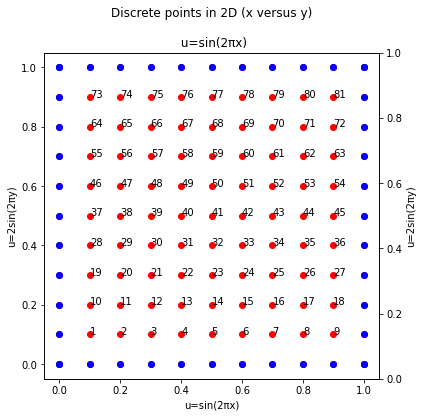

In [5]:
#creating a scatter plot with appropriate labels
fig = plt.figure()

fig, ax1 = plt.subplots(figsize=(6,6))

ax1.scatter(xx, yy, color='r')
ax1.set_xlabel('u=sin(2πx)') #for u(x,0)
ax1.set_ylabel('u=2sin(2πy)') #for u(0,y)
plt.title('Discrete points in 2D (x versus y)\n\n u=sin(2πx)') #for u(x,1)

ax2 = ax1.twinx()
ax2.set_ylabel('u=2sin(2πy)') #for u(1,y)

#coloring the known points
for i in range(11):
    ax1.scatter(0,y[i],color='b')
    ax1.scatter(x[i],0,color='b')
    ax1.scatter(1,y[i],color='b')
    ax1.scatter(x[i],1,color='b')

    
#annotating the unknown points corresponding to numbers.
n = range(1,10)
for i, label, in enumerate(n):
        ax1.annotate(label, (xx[1][i+1], yy[1][i]))
        
n1 = range(10,19)
for i, label, in enumerate(n1):
        ax1.annotate(label, (xx[2][i+1], yy[2][i]))

n2 = range(19,28)
for i, label, in enumerate(n2):
        ax1.annotate(label, (xx[3][i+1], yy[3][i]))
    
n3 = range(28,37)
for i, label, in enumerate(n3):
        ax1.annotate(label, (xx[4][i+1], yy[4][i]))
        
n4 = range(37,46)
for i, label, in enumerate(n4):
        ax1.annotate(label, (xx[5][i+1], yy[5][i]))

n5 = range(46,55)
for i, label, in enumerate(n5):
        ax1.annotate(label, (xx[6][i+1], yy[6][i]))

n6 = range(55,64)
for i, label, in enumerate(n6):
        ax1.annotate(label, (xx[7][i+1], yy[7][i]))

n7 = range(64,73)
for i, label, in enumerate(n7):
        ax1.annotate(label, (xx[8][i+1], yy[8][i]))
        
n8 = range(73,82)
for i, label, in enumerate(n8):
        ax1.annotate(label, (xx[9][i+1], yy[9][i]))







The values of u on the boundary are known, so there are 81 discrete points where $u_{j,k}$ is unknown


Using the five-point Laplacian, we know that each discrete point has its own equation,

$$\frac{u_{j+1,k} + u_{j-1,k} + u_{j,k+1}+ u_{j,k-1} -4u_{j,k}}{h^{2}} =0 $$

To simplify, we will number u at these points u1, u2,....,u81 as in the diagram we constructed.

Using the five-point Laplacian, we can compute the 81 equations for our 81 unknown points

point 1: $u_{2}+sin(2πx)+u_{10}+sin(2πx)-4u_{1} =0$
<br>
point 2: $u_{3}+u_{1}+u_{11}+sin(2πx)-4u_{2} =0$
<br>
point 3: $u_{4}+u_{2}+u_{12}+sin(2πx)-4u_{3} =0$
<br>


And so on.

From these equations, we can see that the pattern of the equation can be represented by a linear system which can be writen in the form of Mu=b

<br>
We are going to construct a 81x81 matrix with the form Mu= b where matrix M is writen in the following form 
 
<center>
    $\begin{bmatrix} 
   J & I & 0 & 0 & 0 & 0 & 0 & 0 & 0
\\ I & J & I & 0 & 0 & 0 & 0 & 0 & 0
\\ 0 & I & J & I & 0 & 0 & 0 & 0 & 0 
\\ 0 & 0 & I & J & I & 0 & 0 & 0 & 0
\\ 0 & 0 & 0 & I & J & I & 0 & 0 & 0 
\\ 0 & 0 & 0 & 0 & I & J & I & 0 & 0
\\ 0 & 0 & 0 & 0 & 0 & I & J & I & 0
\\ 0 & 0 & 0 & 0 & 0 & 0 & I & J & I
\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & I & J
\end{bmatrix} $


,where J is the 9x9 matrix


<center>
$\begin{bmatrix} 
   -4 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0
\\ 1 & -4 & 1 & 0 & 0 & 0 & 0 & 0 & 0
\\ 0 & 1 & -4 & 1 & 0 & 0 & 0 & 0 & 0 
\\ 0 & 0 & 1 & -4 & 1 & 0 & 0 & 0 & 0
\\ 0 & 0 & 0 & 1 & -4 & 1 & 0 & 0 & 0 
\\ 0 & 0 & 0 & 0 & 1 & -4 & 1 & 0 & 0
\\ 0 & 0 & 0 & 0 & 0 & 0 & -4 & 1 & 0
\\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & -4 & 1
\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & -4
\end{bmatrix} $
   
<br> and I is the 9x9 identity matrix
    
    

Finally, we use this equation to solve for u

The first step is to generate a code that computes the matrix J

In [6]:
from scipy.sparse import diags
import numpy as np

n = 9
k = [np.ones(n-1),-4*np.ones(n),np.ones(n-1)]
offset = [-1,0,1]
A = diags(k,offset).toarray() 
A #matrix J


array([[-4.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -4.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -4.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -4.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -4.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -4.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -4.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -4.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -4.]])

Then, we are going to construct an Identity matrix and a matrix of zero both of size 9x9 and use all three matrices to generate the matrix A

In [7]:

B= np.eye(9) #identity matrix
C= np.zeros((9,9)) #zero matrix

#we use np.block to combine the parts of matrices to form matrix M
M=np.block([[A,B,C,C,C,C,C,C,C], 
            [B,A,B,C,C,C,C,C,C],
            [C,B,A,B,C,C,C,C,C],
            [C,C,B,A,B,C,C,C,C],
            [C,C,C,B,A,B,C,C,C],
            [C,C,C,C,B,A,B,C,C],
            [C,C,C,C,C,B,A,B,C],
            [C,C,C,C,C,C,B,A,B],
            [C,C,C,C,C,C,C,B,A]])

M

array([[-4.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -4.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -4.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -4.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -4.]])

Now, we construct the vector b. Firstly, note that b is a vector that consists of constants from the LHS. Thus from the previous point equations,
<br>
<center> point 1: $u_{2}+sin(2πx)+u_{10}+2sin(2πy)-4u_{1} =0$
<br>
<center> point 2: $u_{3}+u_{1}+u_{11}+sin(2πx)-4u_{2} =0$
<br>
<center> point 3: $u_{4}+u_{2}+u_{12}+sin(2πx)-4u_{3} =0$
<br>

and so on..
<br>
The first three elements of the b vector is
$\begin{bmatrix} 
-sin(2πx)-2sin(2πy)\\-sin(2πx)\\-sin(2πx)
\end{bmatrix} $
and so on...
<br>
<br>
<br>
Thus, it is apparant that all the corners have the equation
$$-sin(2πx)-2sin(2πy)$$
<br><br>
While the vertical sides (excluding corner points) have the equation
$$-2sin(2πy)$$
<br><br>
And the horizontal sides (excluding corner points) have the equation
$$-sin(2πx)$$
<br>While the remaining points are zero<br>
Thus, we compute the known points using the mesh grid graph as reference

In [8]:
#firstly create an array of zeros of size 81
points= np.zeros(81) 

#we compute the points in the corner using the five-point Laplacian
points[0]= -2*np.sin(2*np.pi*0.1)-np.sin(2*np.pi*0.1)
points[8]= -2*np.sin(2*np.pi*0.1)-np.sin(2*np.pi*0.9)
points[72]= -2*np.sin(2*np.pi*0.9)-np.sin(2*np.pi*0.1)
points[80]= -2*np.sin(2*np.pi*0.9)-np.sin(2*np.pi*0.9)


#initiate loop to compute all the remaining known points
for i in range(7):
    points[i+1]= -np.sin(0.2*np.pi*(i+2))

for i in range(7):
    points[i+73]= -np.sin(0.2*np.pi*(i+2))
    
for i in range(7):
    points[9*(i+1)]= -2*np.sin(0.2*np.pi*(i+2))

for i in range(7):
    points[9*(i+1)+8]= -2*np.sin(0.2*np.pi*(i+2))


points #b matrix

array([-1.76335576e+00, -9.51056516e-01, -9.51056516e-01, -5.87785252e-01,
       -1.22464680e-16,  5.87785252e-01,  9.51056516e-01,  9.51056516e-01,
       -5.87785252e-01, -1.90211303e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.90211303e+00, -1.90211303e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.90211303e+00, -1.17557050e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.17557050e+00,
       -2.44929360e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.44929360e-16,  1.17557050e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

Finally, after obtaining the matrices for M and b, we solve using np.linalg.solve to get the unknown values of u.

Note that the discrete time points is between the interval (0.1,0.9) and has a total of 9 points since we are calculating the unknown values between the interval (0.1,0.9).

In [9]:
O=np.linalg.solve(M,points)

#here, we set the interval to be (0.1,0.9) and create a meshgrid
X=np.linspace(0.1,0.9, 9)
Y=np.linspace(0.1,0.9, 9)
XX, YY = np.meshgrid(X,Y)

#reshape the meshgrid into a vector
xx=np.reshape(XX,(1,81))
yy=np.reshape(YY,(1,81))

Using the data above, we can plot the approximating solution of the Laplace equation with the above Dirichlet boundary conditions.

Text(0.5, 0.92, 'Approximated Solution')

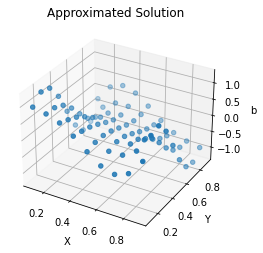

In [10]:
#initialize 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xx, yy, O)

#execute plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('b')
ax.set_title('Approximated Solution')